## IMPORT

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split

## INPUT MODULE

In [3]:
user_data = {}

while True:
    try:
        user_id = int(input("Votre id à partir de 944: "))
        if 944 <= user_id <= 100000:
            user_data['user_id'] = user_id
            break
        else:
            print("L'id doit être entre 944 et 100000")
    except ValueError:
        print("Veuillez saisir un nombre valide")

while True:
    try:
        age = int(input("Votre âge : "))
        if 1 <= age <= 120:
            user_data['age'] = age
            break
        else:
            print("L'âge doit être entre 1 et 120 ans")
    except ValueError:
        print("Veuillez saisir un nombre valide")

while True:
    gender = input("Votre genre (M/F) : ").upper()
    if gender in ['M', 'F']:
        user_data['gender'] = gender
        break
    else:
        print("Veuillez saisir 'M' pour Masculin ou 'F' pour Féminin")

while True:
    pin_code = input("Votre code postal : ").strip()
    if len(pin_code) >= 3:
        user_data['pin_code'] = pin_code
        break
    else:
        print("Veuillez saisir un code postal valide")

while True:
    occupation = input("Votre métier : ").strip()
    if len(occupation) >= 3:
        user_data['occupation'] = occupation
        break
    else:
        print("Veuillez saisir un métier valide")

print(f"Données utilisateur : {user_data}")

Données utilisateur : {'user_id': 950, 'age': 11, 'gender': 'F', 'pin_code': '27641', 'occupation': 'student'}


## PROCESSING MODULE

In [4]:
try:
    ratings = pd.read_csv("ml-100k/u.data", sep="\t", names=["user_id", "movie_id", "rating", "timestamp"])
    user_info = pd.read_csv("ml-100k/u.user", sep="|", names=["user_id", "age", "gender", "occupation", "zip_code"])
    
    print(f"Données chargées:")
    print(f"{len(ratings)} ratings")
    print(f"{ratings['user_id'].nunique()} utilisateurs")
    print(f"{ratings['movie_id'].nunique()} films")
    data_loaded = True
except FileNotFoundError as e:
    print(f"Erreur: Fichiers de données non trouvés - {e}")
    data_loaded = False

if data_loaded:
    train_ratings, test_ratings = train_test_split(ratings, test_size=0.2, random_state=0)
    
    utility_matrix = train_ratings.pivot(index='user_id', columns='movie_id', values='rating')
    utility_matrix = utility_matrix.fillna(0)
    
    print(f"Matrice utilitaire créée: {utility_matrix.shape}")
    print(f"Train set: {len(train_ratings)} ratings")
    print(f"Test set: {len(test_ratings)} ratings")

Données chargées:
100000 ratings
943 utilisateurs
1682 films
Matrice utilitaire créée: (943, 1639)
Train set: 80000 ratings
Test set: 20000 ratings


In [5]:
utility_matrix.head(18)

movie_id,1,2,3,4,5,6,7,8,9,10,...,1668,1669,1672,1673,1674,1676,1677,1678,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,0.0,1.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,5.0,0.0,0.0,5.0,5.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


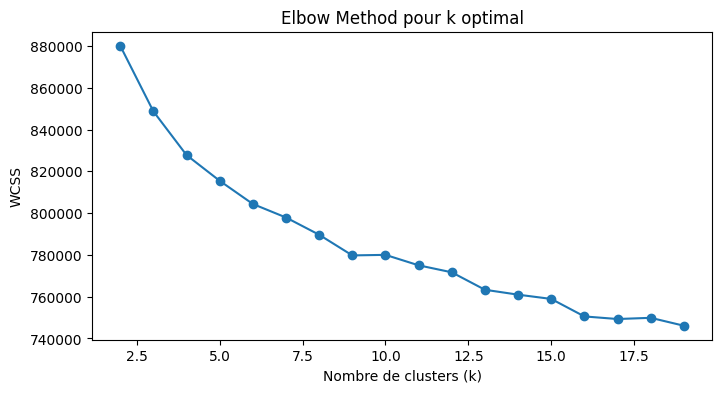

In [6]:
cluster_range = list(range(2, 20))
movie_matrix = utility_matrix.T

wcss = []
for k in cluster_range:
    km = KMeans(n_clusters=k, random_state=0, n_init=10).fit(movie_matrix)
    wcss.append(km.inertia_)

plt.figure(figsize=(8,4))
plt.plot(cluster_range, wcss, marker='o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method pour k optimal")
plt.show()

In [7]:
k_clusters = 19

# K-Means clustering
kmeans = KMeans(n_clusters=k_clusters, random_state=0, n_init=10)
movie_clusters = kmeans.fit_predict(movie_matrix)

# DataFrame des clusters de films
movie_cluster_df = pd.DataFrame({'movie_id': movie_matrix.index,'cluster': movie_clusters}).set_index('movie_id')
movie_cluster_df.head(18)

,cluster
movie_id,
1,4
2,3
3,0
4,3
5,3
6,1
7,4
8,9
9,14


In [8]:
print(movie_cluster_df['cluster'].value_counts().sort_index())

ratings_with_clusters = train_ratings.merge(movie_cluster_df, on='movie_id')
utility_clustered_matrix = ratings_with_clusters.groupby(['user_id', 'cluster'])['rating'].mean().unstack()
utility_clustered_matrix = utility_clustered_matrix.fillna(0)

print(f"Matrice clustérisée créée: {utility_clustered_matrix.shape}")
utility_clustered_matrix.head(18)

cluster
0       70
1     1159
2        2
3      130
4       20
5        6
6       37
7        2
8        7
9       19
10       1
11       1
12      38
13       1
14       2
15       5
16     137
17       1
18       1
Name: count, dtype: int64
Matrice clustérisée créée: (943, 19)


cluster,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
user_id,,,,,,,,,,,,,,,,,,,
1,3.600000,2.820000,4.5,3.175000,3.727273,4.75,4.071429,5.0,4.250000,3.222222,0.0,5.0,3.000000,0.0,5.0,4.50,4.343750,4.0,0.0
2,3.333333,3.333333,5.0,0.000000,3.714286,0.00,0.000000,5.0,0.000000,0.000000,3.0,3.0,3.916667,0.0,5.0,0.00,3.750000,0.0,4.0
3,0.000000,2.590909,0.0,2.000000,0.000000,0.00,0.000000,4.0,4.000000,0.000000,2.0,0.0,2.875000,0.0,0.0,0.00,0.000000,0.0,0.0
4,0.000000,4.444444,0.0,3.000000,5.000000,3.00,4.000000,5.0,0.000000,0.000000,4.0,5.0,4.500000,0.0,0.0,0.00,0.000000,0.0,0.0
5,1.800000,2.045455,0.0,2.756757,3.500000,3.50,3.933333,4.5,3.000000,3.500000,0.0,0.0,0.000000,0.0,5.0,3.00,3.615385,0.0,0.0
6,2.600000,2.961538,5.0,3.333333,2.875000,4.00,3.857143,4.0,3.400000,3.833333,0.0,2.0,3.166667,2.0,4.5,3.00,4.220339,5.0,2.0
7,3.300000,3.555556,4.5,4.015625,3.444444,4.20,4.576923,4.0,4.857143,4.307692,4.0,4.0,3.750000,0.0,5.0,4.60,4.126582,5.0,4.0
8,3.500000,2.142857,4.5,3.750000,4.000000,4.00,4.625000,0.0,5.000000,5.000000,0.0,5.0,0.000000,0.0,0.0,4.50,4.000000,0.0,0.0
9,5.000000,4.750000,0.0,4.666667,4.000000,0.00,0.000000,5.0,0.000000,4.000000,0.0,0.0,4.000000,4.0,0.0,0.00,4.250000,0.0,0.0


In [9]:
similarity_matrix = utility_clustered_matrix.T.corr(method='pearson')
similarity_matrix = similarity_matrix.fillna(0)

print(f"Matrice de similarité créée: {similarity_matrix.shape}")
similarity_matrix.head(18)

Matrice de similarité créée: (943, 943)


user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.058313,-0.009849,0.075065,0.557756,0.709470,0.574588,0.502667,-0.090089,0.278763,...,0.291926,0.262449,0.116331,0.048146,-0.021885,0.169254,0.742071,0.165423,0.369305,0.642951
2,0.058313,1.000000,0.115616,0.205750,-0.060909,-0.021122,0.071239,-0.337671,0.166097,-0.059392,...,-0.018427,0.744546,0.922754,0.750352,0.574020,0.614629,-0.249219,0.539178,-0.381319,0.090005
3,-0.009849,0.115616,1.000000,0.399990,0.081663,-0.115854,0.080505,-0.225920,0.276301,-0.008107,...,0.289838,0.194817,0.004645,0.187366,0.136631,-0.031587,-0.014675,0.308646,0.035965,0.006473
4,0.075065,0.205750,0.399990,1.000000,0.047112,-0.290162,-0.032308,-0.041734,0.206757,-0.403364,...,0.016227,0.194231,0.090310,0.110350,0.404849,0.071746,0.196106,0.335502,0.163380,-0.133086
5,0.557756,-0.060909,0.081663,0.047112,1.000000,0.432588,0.326434,0.312686,0.183759,0.467410,...,0.745662,0.114256,-0.065757,0.293708,-0.081196,-0.025436,0.486539,0.218904,0.366378,0.780787
6,0.709470,-0.021122,-0.115854,-0.290162,0.432588,1.000000,0.445694,0.207353,-0.017118,0.724004,...,0.253512,0.248812,0.123654,0.082323,-0.260167,0.180926,0.349909,0.057691,0.038763,0.556272
7,0.574588,0.071239,0.080505,-0.032308,0.326434,0.445694,1.000000,0.267375,-0.484202,0.064517,...,0.324520,-0.056157,0.038320,-0.007658,-0.380920,-0.000611,0.393168,-0.157062,0.158319,0.383061
8,0.502667,-0.337671,-0.225920,-0.041734,0.312686,0.207353,0.267375,1.000000,-0.070379,0.048099,...,0.187241,-0.094322,-0.196635,-0.412541,-0.359423,-0.096416,0.451734,-0.111579,0.755981,0.511577
9,-0.090089,0.166097,0.276301,0.206757,0.183759,-0.017118,-0.484202,-0.070379,1.000000,0.277440,...,0.242314,0.563269,0.224095,0.452646,0.342744,0.223785,0.125661,0.737542,0.250824,0.050195


In [10]:
age = user_data['age']
gender = user_data['gender']
occupation = user_data['occupation']

similar_users_df = user_info.copy()

max_age_diff = 5  
similar_users_df['age_similarity'] = 1 - (abs(similar_users_df['age'] - age) / max_age_diff)

# Limiter à l'intervalle [0, 1]
similar_users_df['age_similarity'] = similar_users_df['age_similarity'].clip(0, 1)

# Similarité de genre (1 = identique, 0 = différent)
similar_users_df['gender_similarity'] = np.where(similar_users_df['gender'] == gender, 1, 0)

# Similarité d'occupation (1 = identique, 0.2 = différent)
similar_users_df['occupation_similarity'] = np.where(similar_users_df['occupation'].str.lower() == occupation, 1, 0.2)

similar_users_df['similarity_score'] = (similar_users_df['age_similarity'] * 0.7 + similar_users_df['gender_similarity'] * 0.2 + 
                                        similar_users_df['occupation_similarity'] * 0.1)

similar_users_df = similar_users_df.sort_values('similarity_score', ascending=False)

# Obtenir les utilisateurs les plus similaires (plus de variation)
top_similar_users = similar_users_df['user_id'].tolist()

print(f"{len(top_similar_users)} utilisateurs similaires trouvés")

# Afficher des informations détaillées sur les utilisateurs les plus similaires
if len(top_similar_users) > 0:
    top_5 = similar_users_df.head(5)
    print("\nTop 5 utilisateurs les plus similaires:")
    for _, row in top_5.iterrows():
        print(f"- User {row['user_id']}: {row['age']} ans, {row['gender']}, {row['occupation']}")
        print(f"  Score de similarité: {row['similarity_score']:.2f} (âge: {row['age_similarity']:.2f}, " +
            f"genre: {row['gender_similarity']:.2f}, occupation: {row['occupation_similarity']:.2f})")

943 utilisateurs similaires trouvés

Top 5 utilisateurs les plus similaires:
- User 674: 13 ans, F, student
  Score de similarité: 0.72 (âge: 0.60, genre: 1.00, occupation: 1.00)
- User 609: 13 ans, F, student
  Score de similarité: 0.72 (âge: 0.60, genre: 1.00, occupation: 1.00)
- User 289: 11 ans, M, none
  Score de similarité: 0.72 (âge: 1.00, genre: 0.00, occupation: 0.20)
- User 471: 10 ans, M, student
  Score de similarité: 0.66 (âge: 0.80, genre: 0.00, occupation: 1.00)
- User 813: 14 ans, F, student
  Score de similarité: 0.58 (âge: 0.40, genre: 1.00, occupation: 1.00)


In [36]:
# Création directe d'un vecteur de similarité pour l'utilisateur cible
target_user_id = user_data['user_id']

# Initialiser un vecteur de similarité avec des valeurs nulles pour tous les utilisateurs
direct_similarity_vector = pd.Series(0, index=similarity_matrix.columns)

# Définir des seuils pour catégoriser les utilisateurs
top_n = 40
bottom_n = 40
middle_range = len(top_similar_users) - top_n - bottom_n

for user_id in top_similar_users[:top_n]:
    direct_similarity_vector[user_id] = 1.0

least_similar_users = similar_users_df.tail(bottom_n)['user_id'].tolist()
for user_id in least_similar_users:
    direct_similarity_vector[user_id] = -1 

for i, user_id in enumerate(top_similar_users[top_n:-bottom_n]):
    similarity_score = 1.0 - (2.0 * i / (middle_range - 1))
    direct_similarity_vector[user_id] = similarity_score

# Ajouter ce vecteur de similarité à la matrice de similarité
similarity_matrix.loc[target_user_id] = direct_similarity_vector

print(f"Vecteur de similarité créé pour l'utilisateur {target_user_id}")
print(f"Top similarités: {direct_similarity_vector.nlargest(5)}")

Vecteur de similarité créé pour l'utilisateur 950
Top similarités: user_id
49     1.0
52     1.0
142    1.0
198    1.0
203    1.0
dtype: float64


/var/folders/79/75kpj7sx7qlbhtz8l6x_tcpm0000gn/T/ipykernel_8964/1210943419.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.9976798143851509' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  direct_similarity_vector[user_id] = similarity_score


In [37]:
similarity_matrix.tail(1)

user_id,1,2,3,4,5,6,7,8,9,10,...,935,936,937,938,939,940,941,942,943,950
user_id,,,,,,,,,,,,,,,,,,,,,
950,-1.0,0.809745,-0.225058,-0.227378,0.638051,-0.232019,-0.234339,-0.24594,0.162413,-0.25522,...,-0.241299,-0.238979,-0.236659,0.635731,0.990719,-0.229698,0.324826,0.640371,0.24594,0.0


In [42]:
# Créer un profil par défaut vide
default_cluster_preferences = pd.Series(3.0, index=utility_clustered_matrix.columns)

# Ajouter l'utilisateur à utility_clustered_matrix
utility_clustered_matrix.loc[target_user_id] = default_cluster_preferences
utility_clustered_matrix.tail(1)

cluster,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
user_id,,,,,,,,,,,,,,,,,,,
950,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


In [57]:
k_neighbors = 150

def predict_rating(user_id, movie_id):
    """Prédire la note d'un utilisateur pour un film"""
    # Vérifier si le film existe dans le DataFrame de clusters
    if movie_id not in movie_cluster_df.index:
        return 3.0
    
    movie_cluster = movie_cluster_df.loc[movie_id, 'cluster']
    
    if user_id != target_user_id:
        user_similarities = similarity_matrix.loc[user_id]
    else:
        user_similarities = direct_similarity_vector
    
    # Trouver les utilisateurs qui ont noté des films dans ce cluster
    valid_users = utility_clustered_matrix[utility_clustered_matrix[movie_cluster] > 0].index
    valid_similarities = user_similarities[valid_users]
    
    # Prendre les k voisins les plus similaires
    top_k_users = valid_similarities.nlargest(k_neighbors)
    
    weighted_sum = 0
    similarity_sum = 0
    
    # Calculer la note prédite
    for similar_user, similarity in top_k_users.items():
        # Ne pas inclure l'utilisateur lui-même
        if similar_user != user_id and similarity > 0:
            rating = utility_clustered_matrix.loc[similar_user, movie_cluster]
            weighted_sum += similarity * rating
            similarity_sum += similarity
    
    # Éviter la division par zéro
    if similarity_sum > 0:
        predicted_rating = weighted_sum / similarity_sum
        return min(5.0, max(1.0, predicted_rating))
    else:
        return 3.0

In [53]:
# Génération des recommandations
def recommend_movies(user_id, n_recommendations=10):
    """Recommander des films pour un utilisateur"""

    all_movies = movie_cluster_df.index.tolist()
    predictions = []

    for movie_id in all_movies:
        # Vérifier si le film est dans le DataFrame des clusters
        if movie_id not in movie_cluster_df.index:
            continue
        
        # Prédire la note
        predicted_rating = predict_rating(user_id, movie_id)
        
        if predicted_rating >= 3.5:
            predictions.append((movie_id, predicted_rating))
    
    # Trier par note
    predictions.sort(key=lambda x: x[1], reverse=True)
    
    return predictions[:n_recommendations]

## OUTPUT MODULE

In [14]:
# Chargement des informations sur les films
try:
    movie_info = pd.read_csv("ml-100k/u.item", sep="|", encoding='latin-1',
                            names=["movie_id", "title", "release_date", "video_release_date", "imdb_url"] 
                            + [f"genre_{i}" for i in range(19)])
    print("Informations des films chargées")
    movie_info_loaded = True
except FileNotFoundError:
    print("Fichier u.item non trouvé - affichage basique")
    movie_info = None
    movie_info_loaded = False

Informations des films chargées


In [54]:
# Génération et affichage des recommandations
n_recommendations = 10
target_user_id = user_data['user_id']

print(f"\nGÉNÉRATION DES RECOMMANDATIONS pour l'utilisateur {target_user_id}...")

recommendations = recommend_movies(target_user_id, n_recommendations)

if not recommendations:
    print("Aucune recommandation disponible pour cet utilisateur")
else:
    print(f"\nTOP {len(recommendations)} FILMS RECOMMANDÉS")
    print("="*60)
    
    for i, (movie_id, predicted_rating) in enumerate(recommendations, 1):
        movie_title = ""
        movie_year = ""
        
        if movie_info_loaded and movie_id in movie_info['movie_id'].values:
            movie_info_row = movie_info[movie_info['movie_id'] == movie_id].iloc[0]
            movie_title = movie_info_row['title']
            
            # Extraire les genres
            genre_cols = [col for col in movie_info.columns if col.startswith('genre_')]
            genres = []
            for col in genre_cols:
                if movie_info_row[col] == 1:
                    # Extraire le nom du genre à partir du nom de colonne
                    genre_name = col.replace('genre_', '')
                    genres.append(genre_name)
        
        print(f"{i:2d}. {movie_title}")
        print(f"    Note prédite: {predicted_rating:.2f}/5.0")
        print("-" * 60)


GÉNÉRATION DES RECOMMANDATIONS pour l'utilisateur 950...

TOP 10 FILMS RECOMMANDÉS
 1. Star Wars (1977)
    Note prédite: 4.16/5.0
------------------------------------------------------------
 2. Return of the Jedi (1983)
    Note prédite: 4.16/5.0
------------------------------------------------------------
 3. Godfather, The (1972)
    Note prédite: 4.15/5.0
------------------------------------------------------------
 4. Godfather: Part II, The (1974)
    Note prédite: 4.15/5.0
------------------------------------------------------------
 5. Apollo 13 (1995)
    Note prédite: 4.13/5.0
------------------------------------------------------------
 6. Forrest Gump (1994)
    Note prédite: 4.13/5.0
------------------------------------------------------------
 7. Silence of the Lambs, The (1991)
    Note prédite: 4.13/5.0
------------------------------------------------------------
 8. Raiders of the Lost Ark (1981)
    Note prédite: 4.13/5.0
--------------------------------------------

In [59]:
# Évaluation du système sur l'ensemble de test
print(f"\nÉVALUATION DU SYSTÈME")
print("-" * 25)

predictions = []
actuals = []

for _, row in test_ratings.iterrows():
    predicted = predict_rating(row['user_id'], row['movie_id'])
    predictions.append(predicted)
    actuals.append(row['rating'])

rmse = np.sqrt(root_mean_squared_error(actuals, predictions))
print(f"RMSE: {rmse:.6f}")
print(f"Échantillon testé: {len(test_ratings)} ratings")


ÉVALUATION DU SYSTÈME
-------------------------
RMSE: 1.029160
Échantillon testé: 20000 ratings


Évaluation de la RMSE pour différents nombres de clusters:
--------------------------------------------------
Clusters   RMSE           
--------------------------------------------------
2          1.080911       
3          1.045644       
4          1.042619       
5          1.042684       
6          1.033963       
7          1.039787       
8          1.031292       
9          1.032881       
10         1.032508       
11         1.034218       
12         1.034691       
13         1.032535       
14         1.034038       
15         1.035092       
16         1.034986       
17         1.032771       
18         1.032578       
19         1.035314       


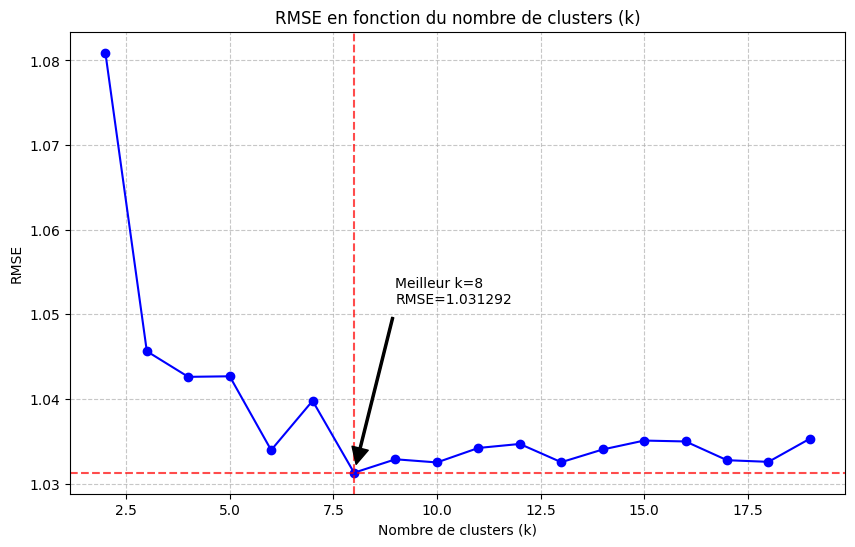


Meilleur nombre de clusters: 8 avec RMSE = 1.031292


In [60]:
# Fonction pour évaluer la RMSE avec différents nombres de clusters
def evaluate_clusters_rmse(train_ratings, test_ratings, utility_matrix, k_range=range(2, 20)):
    """Évalue la RMSE pour différents nombres de clusters"""
    
    results = []
    movie_matrix = utility_matrix.T
    
    print("Évaluation de la RMSE pour différents nombres de clusters:")
    print("-" * 50)
    print("{:<10} {:<15}".format("Clusters", "RMSE"))
    print("-" * 50)
    
    for k in k_range:
        # K-Means clustering
        kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
        movie_clusters = kmeans.fit_predict(movie_matrix)
        
        # DataFrame des clusters de films
        movie_cluster_df = pd.DataFrame({
            'movie_id': movie_matrix.index,
            'cluster': movie_clusters
        }).set_index('movie_id')
        
        # Création de la matrice clustérisée
        ratings_with_clusters = train_ratings.merge(movie_cluster_df, on='movie_id')
        utility_clustered_matrix = ratings_with_clusters.groupby(['user_id', 'cluster'])['rating'].mean().unstack()
        utility_clustered_matrix = utility_clustered_matrix.fillna(0)
        
        # Calcul de la similarité
        similarity_matrix = utility_clustered_matrix.T.corr(method='pearson')
        similarity_matrix = similarity_matrix.fillna(0)
        
        # Test avec k_neighbors optimal
        k_neighbors = 10
        
        # Prédictions
        predictions = []
        actuals = []
        
        for _, row in test_ratings.iterrows():
            user_id = row['user_id']
            movie_id = row['movie_id']
            
            # Skip si l'utilisateur ou le film n'existe pas
            if user_id not in utility_clustered_matrix.index or movie_id not in movie_cluster_df.index:
                continue
                
            movie_cluster = movie_cluster_df.loc[movie_id, 'cluster']
            user_similarities = similarity_matrix.loc[user_id].abs()
            
            valid_users = utility_clustered_matrix[utility_clustered_matrix[movie_cluster] > 0].index
            valid_similarities = user_similarities[valid_users]
            
            if len(valid_similarities) == 0:
                predictions.append(3.0)  # Valeur par défaut
            else:
                top_k_users = valid_similarities.nlargest(k_neighbors)
                
                weighted_sum = 0
                similarity_sum = 0
                
                for similar_user, similarity in top_k_users.items():
                    if similar_user != user_id and similarity > 0:
                        rating = utility_clustered_matrix.loc[similar_user, movie_cluster]
                        weighted_sum += similarity * rating
                        similarity_sum += similarity
                
                if similarity_sum == 0:
                    predictions.append(3.0)  # Valeur par défaut
                else:
                    predicted_rating = weighted_sum / similarity_sum
                    predictions.append(min(5.0, max(1.0, predicted_rating)))
                    
            actuals.append(row['rating'])
        
        # Calcul de la RMSE
        rmse = np.sqrt(root_mean_squared_error(actuals, predictions))
        
        # Ajout aux résultats
        results.append((k, rmse))
        
        print("{:<10} {:<15.6f}".format(k, rmse))
    
    return results

# Exécuter l'évaluation
cluster_rmse_results = evaluate_clusters_rmse(train_ratings, test_ratings, utility_matrix)

# Visualiser les résultats
plt.figure(figsize=(10, 6))
k_values = [k for k, _ in cluster_rmse_results]
rmse_values = [rmse for _, rmse in cluster_rmse_results]
plt.plot(k_values, rmse_values, marker='o', linestyle='-', color='blue')
plt.title('RMSE en fonction du nombre de clusters (k)')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('RMSE')
plt.grid(True, linestyle='--', alpha=0.7)

# Trouver le k optimal
best_k = k_values[rmse_values.index(min(rmse_values))]
best_rmse = min(rmse_values)
plt.axvline(x=best_k, color='red', linestyle='--', alpha=0.7)
plt.axhline(y=best_rmse, color='red', linestyle='--', alpha=0.7)
plt.annotate(f'Meilleur k={best_k}\nRMSE={best_rmse:.6f}', 
            xy=(best_k, best_rmse), xytext=(best_k+1, best_rmse+0.02),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))
plt.show()

print(f"\nMeilleur nombre de clusters: {best_k} avec RMSE = {best_rmse:.6f}")